#  Singlet doublet fermion dark matter model

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *

## Feynrules implementation
[Preliminary Analysis](../../../2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb)

See also full results with user galcen in fisica? or gfif?


## Check one point

In [3]:
a=hep(MODEL='radinertDTFDTSDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [5]:
v=a.vev
#lambda_1=0.13
mdf=2.10E+02
mtf=-2.101E+02

devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)

a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MDFIN'][1]='%0.8E       #MDF' %mdf  # -> Fill a.Series.MDF
a.LHA.blocks['MTFIN'][1]='%0.8E       #MTF' %mtf 
a.LHA.blocks['PI1IN'][1]='%0.8E       #PI1' %3.
a.LHA.blocks['PI2IN'][1]='%0.8E       #PI2' %3.
a.LHA.blocks['MINPAR'][9]='%0.8E      #mEt2Input' %5.0000000E+06
a.LHA.blocks['MINPAR'][10]='%0.8E     #mu3Input' %8.1357150E+06
a.pdg['Chi_2p']=-210000602
moc=a.runmicromegas(Direct_Detection=True)
tmp=a.branchings(a.LHA_out.decays,min_pdg=25)
#Store some masses in the main Output
a.Series['Nv_1']=a.LHA_out.blocks['MASS'][a.pdg.pdg_name.Nv_1]
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,a.Series.sigmav

Omega h^2, SI proton, neutron = 0.121 0.0 0.0 1.08e-26


In [6]:
a.Br_names.keys().values

array(['h0 ->  SBAR S', 'h0 ->  DBAR D', 'h0 ->  W- W+',
       'h0 ->  GLUE GLUE', 'h0 ->  PHOT PHOT', 'h0 ->  MU+ MU-',
       'h0 ->  Z0 Z0', 'h0 ->  E+ E-', 'h0 ->  CBAR C', 'h0 ->  UBAR U',
       'h0 ->  BBAR B', 'h0 ->  TAU+ TAU-', 'Nv_2 ->  Nv_1 Z0',
       'Chi_1 ->  Nv_1 W+', 'Chi_2 ->  Nv_1 W+', 'Nv_3 ->  Nv_1 Z0',
       'etI ->  unknown', 'etI ->  TAU+ Chi_2p', 'etI ->  Nv_3 NUM',
       'etI ->  MU+ Chi_2p', 'etI ->  TAU- Chi_1', 'etI ->  Nv_3 NUE',
       'etI ->  MU- Chi_2', 'etI ->  Nv_2 NUM', 'etI ->  Nv_3 NUT',
       'etI ->  E- Chi_2', 'etI ->  MU- Chi_1', 'etI ->  E+ Chi_2p',
       'etI ->  Nv_2 NUT', 'etI ->  E- Chi_1', 'etI ->  Nv_2 NUE',
       'etI ->  TAU- Chi_2', 'XP_1 ->  E+ Nv_1', 'XP_1 ->  E+ Nv_2',
       'XP_1 ->  E+ Nv_3', 'XP_1 ->  NUE Chi_2', 'XP_1 ->  NUM Chi_1',
       'XP_1 ->  NUE Chi_1', 'XP_1 ->  MU+ Nv_3', 'XP_1 ->  TAU+ Nv_2',
       'XP_1 ->  NUM Chi_2', 'XP_1 ->  NUT Chi_2', 'XP_1 ->  NUT Chi_1',
       'XP_1 ->  TAU+ Nv_3', 'XP_1 ->  MU+ 

In [7]:
m=pd.DataFrame()
m['pdg']=a.LHA_out_with_comments.blocks['MASS'].entries.keys()
m['MASS']=a.LHA_out_with_comments.blocks['MASS'].entries.values()
m[m.pdg>24].reset_index(drop=True)

,pdg,MASS
0,25,1.28884180E+02 # hh
1,1002,2.23600020E+03 # etI
2,1003,2.23606798E+03 # XP_1
3,1004,2.85232279E+03 # XP_2
4,1005,2.23613576E+03 # XO_1
5,1006,2.85232279E+03 # XO_2
6,310000601,-2.10000000E+02# Nv_1
7,310000602,5.62916750E+02 # Nv_2
8,310000603,-5.63016750E+02# Nv_3
9,210000601,5.62916750E+02 # Chi_1


## Scan $m_{DM}$
### Higgsilino-like

In [8]:
df=pd.DataFrame()
a.LHA.blocks['MTFIN'][1]='%0.8E       #MTF' %1.5E3
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['PI1IN'][1]='%0.8E       #PI1' %0.
a.LHA.blocks['PI2IN'][1]='%0.8E       #PI2' %0.
dm_masses=np.linspace(100,1200,40)
for MDF in dm_masses:
    if np.where(dm_masses==MDF)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDF)[0][0]
    a.LHA.blocks['MDFIN'][1]='%0.8E       #MDF' %MDF  # -> Fill a.Series.MDF
    DD=True
    a.runmicromegas(Direct_Detection=DD)
    a.Series['Omega_h2_official']=a.micromegas.Omega_h2
    if DD:
        a.Series['proton_SI_official']=a.micromegas.proton_SI
        a.Series['neutron_SI_official']=a.micromegas.neutron_SI
        a.Series['sigmav_official']=a.micromegas.sigmav
    df=df.append(a.Series,ignore_index=True)

0
10
20
30


### Relic density

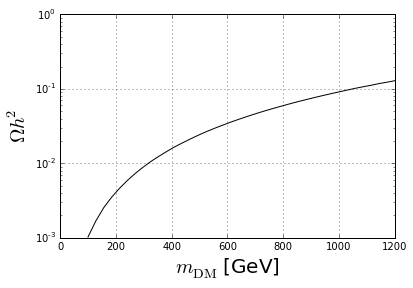

In [9]:
plt.semilogy(df.MDF,df.Omega_h2,'k-',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()

Three level DD is zero

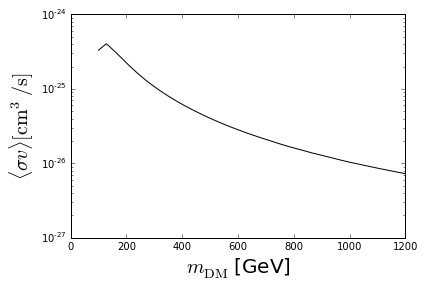

In [10]:
plt.semilogy(df.MDF,df.sigmav,'k-',label='SARAH')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\langle\sigma v \rangle [{\rm cm}^3/{\rm s}]$' ,size=20)

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)